In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rent-price-in-barcelona-2014-2022/Barcelona_rent_price.csv


# Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error

# Read Data

In [3]:
data=pd.read_csv('/kaggle/input/rent-price-in-barcelona-2014-2022/Barcelona_rent_price.csv')

# Show 5 first row in data

In [4]:
data.head()

,Year,Trimester,District,Neighbourhood,Average _rent,Price
0,2014,1,Ciutat Vella,el Raval,average rent (euro/month),589.55
1,2014,1,Ciutat Vella,Gothic Quarter,average rent (euro/month),712.79
2,2014,1,Ciutat Vella,la Barceloneta,average rent (euro/month),540.71
3,2014,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",average rent (euro/month),673.44
4,2014,1,Eixample,Fort Pienc,average rent (euro/month),736.09


# Show columns of data

In [5]:
x=1
for col in data.columns:
    print(f'column {x} is :',col)
    x+=1

column 1 is : Year
column 2 is : Trimester
column 3 is : District
column 4 is : Neighbourhood
column 5 is : Average _rent
column 6 is : Price


# Data corr

In [6]:
data.corr()

,Year,Trimester,Price
Year,1.000000,-0.088623,0.098240
Trimester,-0.088623,1.000000,0.010525
Price,0.098240,0.010525,1.000000


# Show data corr

<AxesSubplot:>

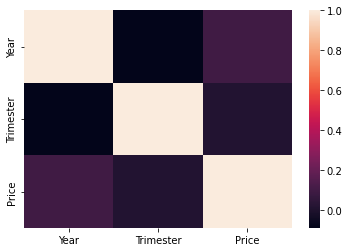

In [7]:
sns.heatmap(data.corr())

# data info

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           4622 non-null   int64  
 1   Trimester      4622 non-null   int64  
 2   District       4622 non-null   object 
 3   Neighbourhood  4622 non-null   object 
 4   Average _rent  4622 non-null   object 
 5   Price          4622 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 216.8+ KB


# show data contain null data

In [9]:
data.isnull().sum()

Year             0
Trimester        0
District         0
Neighbourhood    0
Average _rent    0
Price            0
dtype: int64

# show data contain dublicate data

In [10]:
data.duplicated().sum()

0

# Show input X and output y

In [11]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

# Show input X

In [12]:
X

,Year,Trimester,District,Neighbourhood,Average _rent
0,2014,1,Ciutat Vella,el Raval,average rent (euro/month)
1,2014,1,Ciutat Vella,Gothic Quarter,average rent (euro/month)
2,2014,1,Ciutat Vella,la Barceloneta,average rent (euro/month)
3,2014,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",average rent (euro/month)
4,2014,1,Eixample,Fort Pienc,average rent (euro/month)
...,...,...,...,...,...
4617,2022,2,Sant Marti,Diagonal Mar i el Front Maritim del Poblenou,average rent per surface (euro/m2)
4618,2022,2,Sant Marti,el Besos i el Maresme,average rent per surface (euro/m2)
4619,2022,2,Sant Marti,Provencals del Poblenou,average rent per surface (euro/m2)
4620,2022,2,Sant Marti,Sant Marti de Provencals,average rent per surface (euro/m2)


# Show output y

In [13]:
y

0       589.55
1       712.79
2       540.71
3       673.44
4       736.09
         ...  
4617     17.50
4618     12.20
4619     14.60
4620     11.90
4621     11.40
Name: Price, Length: 4622, dtype: float64

# transform String data 

In [14]:
string_data=['District','Neighbourhood','Average _rent']
label = LabelEncoder()
for i in string_data:
    X[i]=label.fit_transform(X[i])
X    

,Year,Trimester,District,Neighbourhood,Average _rent
0,2014,1,0,47,0
1,2014,1,0,7,0
2,2014,1,0,50,0
3,2014,1,0,23,0
4,2014,1,1,6,0
...,...,...,...,...,...
4617,2022,2,7,5,1
4618,2022,2,7,34,1
4619,2022,2,7,14,1
4620,2022,2,7,21,1


# Splitting data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (3096, 5)
X_test shape is  (1526, 5)
y_train shape is  (3096,)
y_test shape is  (1526,)


# Applying Linear Regression Model 

In [16]:
LinearRegressionModel = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)
LinearRegressionModel.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(n_jobs=-1, normalize=True)

# Calculating Details

In [17]:
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))
print('Linear Regression Coef is : ' , LinearRegressionModel.coef_)
print('Linear Regression intercept is : ' , LinearRegressionModel.intercept_)

Linear Regression Train Score is :  0.8474010568280299
Linear Regression Test Score is :  0.8392662802720678
Linear Regression Coef is :  [ 1.99137625e+01  8.22646269e+00  5.47015256e+00 -9.87051084e-02
 -8.06012685e+02]
Linear Regression intercept is :  -39405.71663276178


# Applying Random Forest Regressor Model 

In [18]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=15, random_state=33)
RandomForestRegressorModel.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, random_state=33)

# Calculating Details

In [19]:
print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))
print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_)
print('Random Forest Regressor features importances are : ' , RandomForestRegressorModel.feature_importances_)

Random Forest Regressor Train Score is :  0.9986012893759983
Random Forest Regressor Test Score is :  0.9862618987383104
Random Forest Regressor No. of features are :  5
Random Forest Regressor features importances are :  [0.02787488 0.00323931 0.08558485 0.04866626 0.8346347 ]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


# Show RandomForestRegressorModel.n_features_

<BarContainer object of 5 artists>

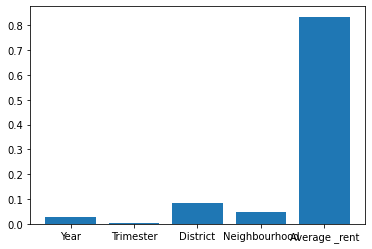

In [20]:
plt.bar(X_train.keys(),RandomForestRegressorModel.feature_importances_)

# Show y_train and y_train_pred

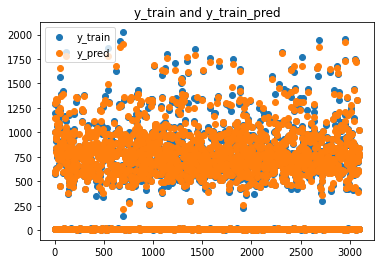

In [21]:
y_bar=list(range(1,3097))
plt.scatter(y_bar,y_train,label='y_train')
plt.scatter(y_bar,RandomForestRegressorModel.predict(X_train),label='y_pred')
plt.title('y_train and y_train_pred')
plt.legend()

# Show y_train and y_train_pred

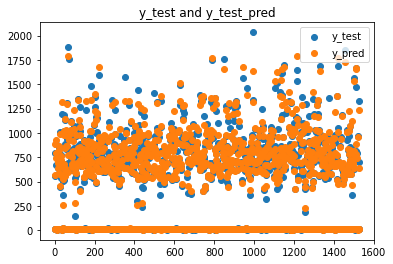

In [22]:
y_bar=list(range(1,1527))
plt.scatter(y_bar,y_test,label='y_test')
plt.scatter(y_bar,RandomForestRegressorModel.predict(X_test),label='y_pred')
plt.title('y_test and y_test_pred')
plt.legend()

# Show y_test

In [23]:
y_test

2909     796.60
651      558.49
4461      12.10
4201      10.20
2764     883.40
         ...   
3300     966.40
1759     699.81
4492    1328.60
1485      11.15
3127      12.40
Name: Price, Length: 1526, dtype: float64

# Show y_pred

In [24]:
y_pred=RandomForestRegressorModel.predict(X_test)
y_pred

array([ 881.69582222,  563.61872275,   11.43260812, ..., 1239.26706667,
         10.09836262,   12.57461556])

# Calculating Mean Absolute Error

In [25]:
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

Mean Absolute Error Value is :  20.873495043112936


# Calculating Mean Squared Error

In [26]:
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  2741.561793024807


# Calculating Median Absolute Error

In [27]:
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Absolute Error Value is : ', MdSEValue )

Median Absolute Error Value is :  1.7228153968252968


# y_pred to csv

In [28]:
submision=pd.DataFrame(y_pred,columns=['prediction'])
submision.to_csv('/kaggle/working/prediction.csv')
submision

,prediction
0,881.695822
1,563.618723
2,11.432608
3,11.571389
4,923.497779
...,...
1521,963.106633
1522,643.517005
1523,1239.267067
1524,10.098363
